<h1>REGIONE LOMBARDIA</h1>

Confronto dei dati relativi ai decessi registrati dall'ISTAT e i decessi causa COVID-19 registrati dalla Protezione Civile Italiana con i decessi previsti dal modello predittivo SARIMA.

<h2>DECESSI MENSILI REGIONE LOMBARDIA ISTAT</h2>

Il DataFrame contiene i dati relativi ai decessi mensili della regione <b>Lombardia</b> dal <b>2015</b> al <b>30 settembre 2020</b>.

In [1]:
import matplotlib.pyplot as plt

import pandas as pd
decessi_istat = pd.read_csv('../../csv/regioni/lombardia.csv')
decessi_istat.head()

,DATA,TOTALE
0,2015-01-31,10536
1,2015-02-28,9342
2,2015-03-31,9017
3,2015-04-30,8032
4,2015-05-31,7547


In [2]:
decessi_istat['DATA'] = pd.to_datetime(decessi_istat['DATA'])
decessi_istat.TOTALE = pd.to_numeric(decessi_istat.TOTALE)


<h3>Recupero dei dati inerenti al periodo COVID-19</h3>

In [3]:
decessi_istat = decessi_istat[decessi_istat['DATA'] > '2020-02-29']
decessi_istat.head()


,DATA,TOTALE
62,2020-03-31,25622
63,2020-04-30,17212
64,2020-05-31,8873
65,2020-06-30,7693
66,2020-07-31,7757


<h3>Creazione serie storica dei decessi ISTAT</h3>

In [4]:
decessi_istat = decessi_istat.set_index('DATA')
decessi_istat = decessi_istat.TOTALE
decessi_istat

DATA
2020-03-31    25622
2020-04-30    17212
2020-05-31     8873
2020-06-30     7693
2020-07-31     7757
2020-08-31     7934
2020-09-30     7442
Name: TOTALE, dtype: int64

<h2>DECESSI MENSILI REGIONE LOMBARDIA CAUSATI DAL COVID</h2>

Il DataFrame contine i dati forniti dalla Protezione Civile relativi ai decessi mensili della regione <b>Lombardia</b> da <b> marzo 2020</b> al <b>30 settembre 2020</b>.

In [5]:
covid = pd.read_csv('../../csv/regioni_covid/lombardia.csv')
covid.head()

,data,deceduti
0,2020-03-31,7199.0
1,2020-04-30,6573.0
2,2020-05-31,2340.0
3,2020-06-30,532.0
4,2020-07-31,162.0


In [6]:
covid['data'] = pd.to_datetime(covid['data'])
covid.deceduti = pd.to_numeric(covid.deceduti)

In [7]:
covid = covid.set_index('data')
covid.head()

,deceduti
data,
2020-03-31,7199.0
2020-04-30,6573.0
2020-05-31,2340.0
2020-06-30,532.0
2020-07-31,162.0


<h3>Creazione serie storica dei decessi COVID-19</h3>

In [8]:
covid = covid.deceduti

<h2>PREDIZIONE DECESSI MENSILI REGIONE SECONDO MODELLO SARIMA</h2>

Il DataFrame contiene i dati riguardanti i decessi mensili della regione <b>Lombardia</b> secondo la predizione del modello SARIMA applicato. 

In [9]:
predictions = pd.read_csv('../../csv/pred/predictions_SARIMA_lombardia.csv')
predictions.head()

,Unnamed: 0,predicted_mean
0,2015-01-31,0.000000
1,2015-02-28,10484.775453
2,2015-03-31,9492.296368
3,2015-04-30,9218.401616
4,2015-05-31,8357.443709


In [10]:
predictions.rename(columns={'Unnamed: 0': 'Data', 'predicted_mean':'Totale'}, inplace=True)
predictions.head()

,Data,Totale
0,2015-01-31,0.000000
1,2015-02-28,10484.775453
2,2015-03-31,9492.296368
3,2015-04-30,9218.401616
4,2015-05-31,8357.443709


In [11]:
predictions['Data'] = pd.to_datetime(predictions['Data'])
predictions.Totale = pd.to_numeric(predictions.Totale)

<h3>Recupero dei dati inerenti al periodo COVID-19</h3>

In [12]:
predictions = predictions[predictions['Data'] > '2020-02-29']
predictions.head()

,Data,Totale
62,2020-03-31,8779.775281
63,2020-04-30,8373.413541
64,2020-05-31,8241.767199
65,2020-06-30,8185.838429
66,2020-07-31,8020.785839


In [13]:
predictions = predictions.set_index('Data')
predictions.head()

,Totale
Data,
2020-03-31,8779.775281
2020-04-30,8373.413541
2020-05-31,8241.767199
2020-06-30,8185.838429
2020-07-31,8020.785839


<h3>Creazione serie storica dei decessi secondo la predizione del modello</h3>

In [14]:
predictions = predictions.Totale

<h1>INTERVALLI DI CONFIDENZA </h1>

<h3>Limite massimo</h3>

In [15]:
upper = pd.read_csv('../../csv/upper/predictions_SARIMA_lombardia_upper.csv')
upper.head()

,Unnamed: 0,upper TOTALE
0,2015-01-31,19762.083333
1,2015-02-28,12431.123016
2,2015-03-31,11414.224319
3,2015-04-30,11119.824293
4,2015-05-31,10251.296447


In [16]:
upper.rename(columns={'Unnamed: 0': 'Data', 'upper TOTALE':'Totale'}, inplace=True)
upper['Data'] = pd.to_datetime(upper['Data'])
upper.Totale = pd.to_numeric(upper.Totale)
upper.head()

,Data,Totale
0,2015-01-31,19762.083333
1,2015-02-28,12431.123016
2,2015-03-31,11414.224319
3,2015-04-30,11119.824293
4,2015-05-31,10251.296447


In [17]:
upper = upper[upper['Data'] > '2020-02-29']
upper = upper.set_index('Data')
upper.head()

,Totale
Data,
2020-03-31,10214.875113
2020-04-30,9808.889196
2020-05-31,9678.596645
2020-06-30,9623.959904
2020-07-31,9458.908781


In [18]:
upper = upper.Totale

<h3>Limite minimo

In [19]:
lower = pd.read_csv('../../csv/lower/predictions_SARIMA_lombardia_lower.csv')
lower.head()

,Unnamed: 0,lower TOTALE
0,2015-01-31,-19762.083333
1,2015-02-28,8538.427889
2,2015-03-31,7570.368418
3,2015-04-30,7316.978940
4,2015-05-31,6463.590971


In [20]:
lower.rename(columns={'Unnamed: 0': 'Data', 'lower TOTALE':'Totale'}, inplace=True)
lower['Data'] = pd.to_datetime(lower['Data'])
lower.Totale = pd.to_numeric(lower.Totale)
lower.head()

,Data,Totale
0,2015-01-31,-19762.083333
1,2015-02-28,8538.427889
2,2015-03-31,7570.368418
3,2015-04-30,7316.978940
4,2015-05-31,6463.590971


In [21]:
lower = lower[lower['Data'] > '2020-02-29']
lower = lower.set_index('Data')
lower.head()

,Totale
Data,
2020-03-31,7344.675449
2020-04-30,6937.937887
2020-05-31,6804.937753
2020-06-30,6747.716953
2020-07-31,6582.662896


In [22]:
lower = lower.Totale

<h1> CONFRONTO DELLE SERIE STORICHE </h1>

Di seguito il confronto grafico tra le serie storiche dei <b>decessi totali mensili</b>, dei <b>decessi causa COVID-19</b> e dei <b>decessi previsti dal modello SARIMA</b> della regione <b>Lombardia</b>.
<br />
I mesi di riferimento sono: <b>marzo</b>, <b>aprile</b>, <b>maggio</b>, <b>giugno</b>, <b>luglio</b>, <b>agosto</b> e <b>settembre</b>.

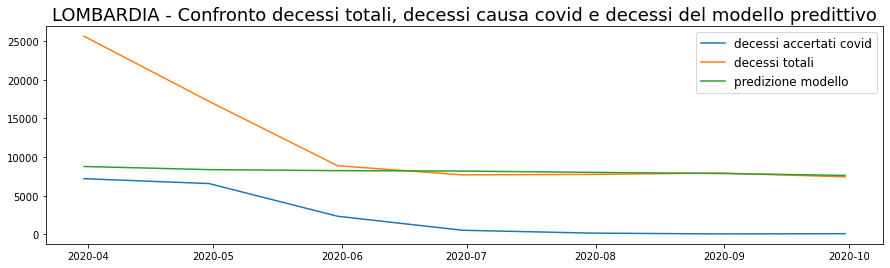

In [23]:
plt.figure(figsize=(15,4))
plt.title('LOMBARDIA - Confronto decessi totali, decessi causa covid e decessi del modello predittivo', size=18)
plt.plot(covid, label='decessi accertati covid')
plt.plot(decessi_istat, label='decessi totali')
plt.plot(predictions, label='predizione modello')
plt.legend(prop={'size': 12})
plt.show()

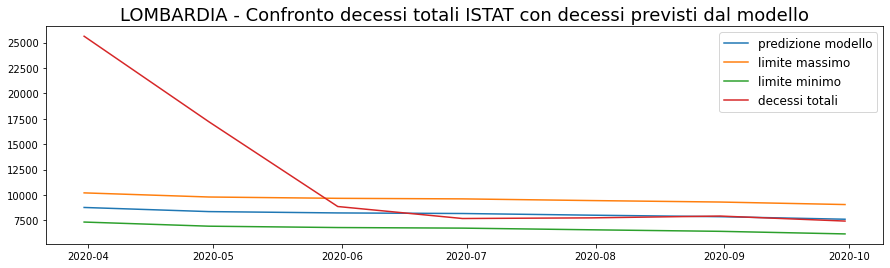

In [24]:
plt.figure(figsize=(15,4))
plt.title("LOMBARDIA - Confronto decessi totali ISTAT con decessi previsti dal modello", size=18)
plt.plot(predictions, label='predizione modello')
plt.plot(upper, label='limite massimo')
plt.plot(lower, label='limite minimo')
plt.plot(decessi_istat, label='decessi totali')
plt.legend(prop={'size': 12})
plt.show()

<h2>Calcolo dei decessi COVID-19 secondo il modello predittivo</h2>

Differenza tra i decessi totali rilasciati dall'ISTAT e i decessi secondo la previsione del modello SARIMA.

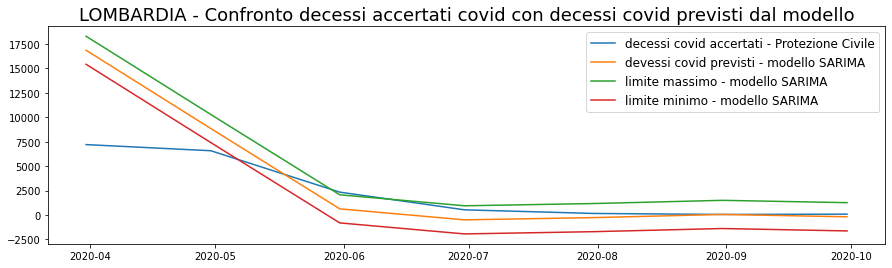

In [25]:
n = decessi_istat - predictions
n_upper = decessi_istat - lower 
n_lower = decessi_istat - upper

plt.figure(figsize=(15,4))
plt.title("LOMBARDIA - Confronto decessi accertati covid con decessi covid previsti dal modello", size=18)
plt.plot(covid, label='decessi covid accertati - Protezione Civile')
plt.plot(n, label='devessi covid previsti - modello SARIMA')
plt.plot(n_upper, label='limite massimo - modello SARIMA')
plt.plot(n_lower, label='limite minimo - modello SARIMA')
plt.legend(prop={'size': 12})
plt.show()

Gli <b>intervalli</b> corrispondono alla differenza tra i decessi totali forniti dall'ISTAT per i mesi di marzo, aprile, maggio e giugno 2020 e i valori degli <b>intervalli di confidenza</b> (intervallo superiore e intervallo inferiore) del modello predittivo SARIMA dei medesimi mesi.

In [26]:
d = decessi_istat.sum()
print("Decessi 2020:", d)

Decessi 2020: 82533


In [27]:
d_m = predictions.sum()
print("Decessi attesi dal modello 2020:", d_m)

Decessi attesi dal modello 2020: 57096.764646363634


In [28]:
d_lower = lower.sum()
print("Decessi attesi dal modello 2020 - livello mimino:", d_lower)

Decessi attesi dal modello 2020 - livello mimino: 47027.967064348566


<h3>Numero totale dei decessi accertati COVID-19 per la regione Lombardia </h3>

In [29]:
m = covid.sum()
print(int(m))

16955


<h3>Numero totale dei decessi COVID-19 previsti dal modello per la regione Lombardia </h3>

<h4>Valore medio

In [30]:
total = n.sum()
print(int(total))

25436


<h4>Valore massimo

In [31]:
total_upper = n_upper.sum()
print(int(total_upper))

35505


<h4>Valore minimo

In [32]:
total_lower = n_lower.sum()
print(int(total_lower))

15367


<h3>Calcolo del numero dei decessi COVID-19 non registrati secondo il modello predittivo SARIMA della regione Lombardia</h3>

<h4>Valore medio

In [33]:
x = decessi_istat - predictions - covid
x = x.sum()
print(int(x))

8481


<h4>Valore massimo

In [34]:
x_upper = decessi_istat - lower - covid
x_upper = x_upper.sum()
print(int(x_upper))

18550


<h4>Valore minimo

In [35]:
x_lower = decessi_istat - upper - covid
x_lower = x_lower.sum()
print(int(x_lower))

-1587
